# 1. The inverse transform

There is a simple, sometimes useful transformation, known as the probability integral transform, that allows us to transform any random variable into a uniform random variable and, more importantly, vice versa. For example, if $X$ has density $f$ and cdf $F$, then we have the relation

$$F(x) = \int_{-\infty}^{x} f(x)dx$$

and if we set $U = F(X)$, then $U$ is a random variable distributed from a uniform $\mathcal{U}(0, 1)$. This is because

$$P(U \leq u) = P[F(X)\leq F(x) ] = P[F^{-1}(F(X))\leq  F^{-1}(F(x))] = P(X \leq x),$$

where we have assumed that $F$ has an inverse.

For a random variable $X$ with cdf $F$, if $F^{-}(u)=\inf\{x,F(x)\leq u\}$, then , for $U\sim \mathcal{|U}_{[0,1]}$, for all $y\in \mathbb{R}$,

$$P(F^{-}(U)\leq y)=P(\inf\{x,F(x)\leq U\}\leq y)=P(F(y)\geq U)=F(y)$$

## Example: Exponential Distribution

If $X \sim Exp(1)$, then $F(x)=1-e^{-x}$. Solving for $x$ in $u=1-e^{-x}$ gives $x=-\log (1-u)$. Therefore, if $U\sim \mathcal{U}_{[0,1]}$, then 

$$X= - \log U \sim Exp(1)$$

$$pdf:f(x)=\lambda \exp(-\lambda x), \quad cdf: F(x)=1-e^{-x}$$

$$x=-\log (1-u)$$

In [194]:
import numpy as np
import matplotlib.pyplot as plt

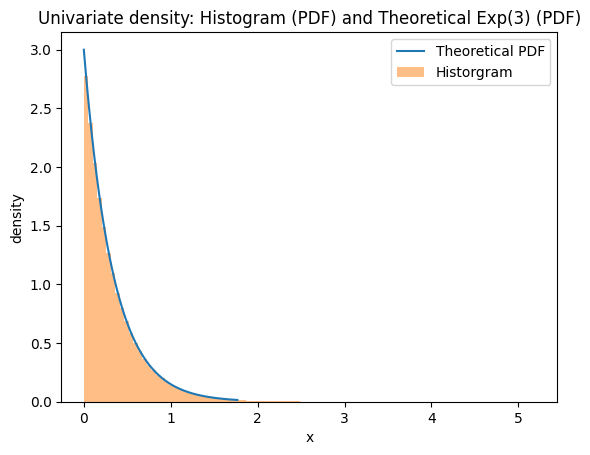

In [195]:
def exponential(l=1,n=1000000):
    rng = np.random.default_rng(12345)
    U = rng.uniform(0, 1.0, size=n)
    X = -np.log(U)*1/l
    x = np.asarray(X, float)
    return x

def exponential_pdf(x,l):
    return l * np.exp(-l * x)

def plot_exponential(l=1):
    grid = np.linspace(x.min(), np.percentile(x, 99.5), 600)
    pdf = exponential_pdf(grid,l)
    plt.figure()
    plt.plot(grid, pdf, label = "Theoretical PDF")
    plt.hist(x, bins=100, density=True, alpha=0.5, label="Historgram")
    plt.xlabel("x")
    plt.ylabel("density")
    plt.title(f"Univariate density: Histogram (PDF) and Theoretical Exp({l}) (PDF)")
    plt.legend()
    plt.show()
    
l = 3  
x = exponential(l)
plot_exponential(l)

## Example: Logistic Distribution

$$pdf:f(x)=\frac{1}{\beta} \frac{e^{-(x-\mu)/\beta}}{[1+e^{-(x-\mu)/\beta}]^2}, \quad cdf: F(X)= \frac{1}{1+e^{-(x-\mu)/\beta}}$$

$$x = \mu- \beta \log(1/u-1)$$

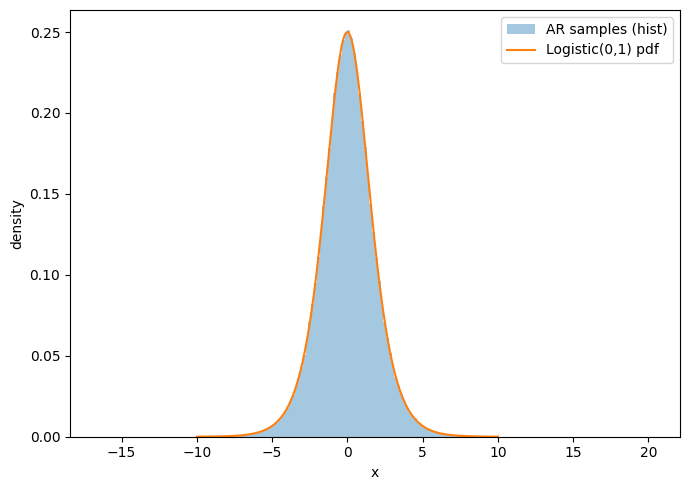

In [210]:
def logistic(mu=0,beta=1,n=1000000):
    u = rng.random(n)
    mu =0
    beta = 1
    x= mu - beta * np.log(1/u-1)
    x = np.asarray(x, float)
    return x
    

def logistic_pdf(x, mu, beta):
    return 1/beta *np.exp(-(x-mu)/beta)/((1+np.exp(-(x-mu)/beta))**2)


def logistic_plot(x,mu=0,beta=1):
    grid = np.linspace(-10, 10, 600)
    pdf = logistic_pdf(grid, mu, beta)
    plt.figure(figsize=(7,5))
    plt.hist(x, bins=200, density=True, alpha=0.4,label="AR samples (hist)")
    plt.plot(grid, pdf, label=f"Logistic({mu},{beta}) pdf")
    plt.xlabel("x")
    plt.ylabel("density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    
x = logistic()
logistic_plot(x)

## Example: Cauchy Distribution

$$pdf: f(x)=\frac{1}{\pi \sigma} \frac{1}{1+(\frac{x-\mu}{\sigma})^2}, \quad cdf: F(x)=\frac{1}{2}+\frac{1}{\pi}\arctan((x-\mu)/\sigma)$$

$$x= \sigma \tan (\pi(u-1/2))+\mu$$

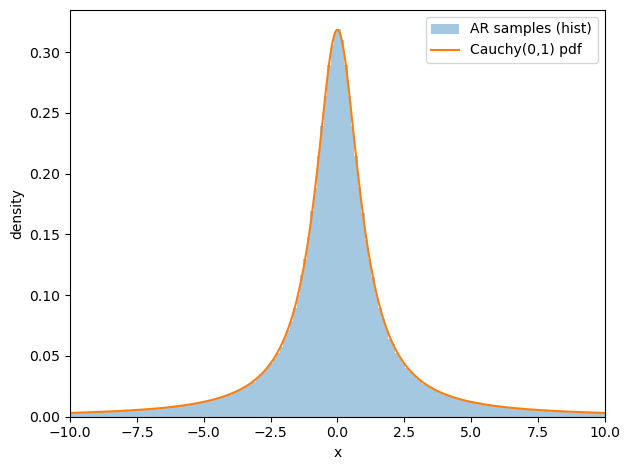

In [270]:
u = rng.random(1000000)
u = np.clip(u, 0.005, 0.995)
mu =0
sigma = 1
x= mu + sigma * np.tan(np.pi * (u-0.5) )
def cauchy_pdf(x, mu, sigma):
    return (1/(np.pi*sigma))* (1/(1+((x-mu)/sigma)**2))
    
def standard_pdf(x, mu, sigma):
    return 1/(np.sqrt(np.pi)*sigma)*np.exp(-((x-mu)/sigma)**2)


grid = np.linspace(-10, 10, 600)
pdf = cauchy_pdf(grid, mu, sigma)
pdf2 = standard_pdf(grid, mu, sigma)
kde1 = gaussian_kde(x)                
plt.figure()
plt.hist(x, bins=1000, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf, label=f"Cauchy({mu},{beta}) pdf")
plt.xlabel("x")
plt.xlim(-10,10)
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

## Example: Pareto Distribution

$$pdf: f(x)=\alpha x^{-\alpha-1}, \quad cdf: F(x)=1-x^{-\alpha}$$

$$x= (1-u)^{-1/\alpha}$$

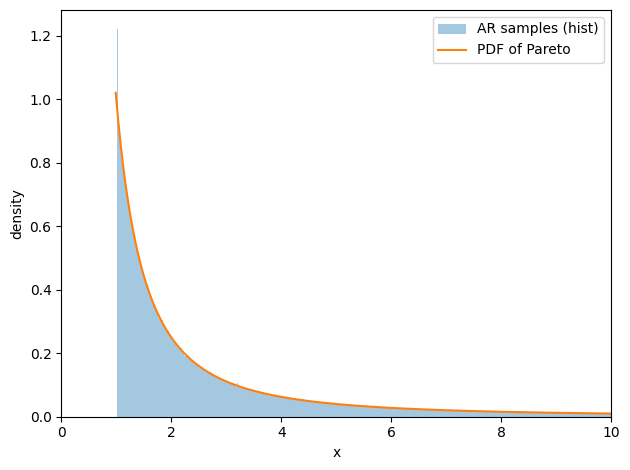

In [213]:
def pareto(a= 1,n=1000000):
    u = rng.random(n)
    u = np.clip(u, 0.005, 0.995)
    x= (1-u)**(-1/a)
    return x
    

def plot_pareto(x, a=1):
    grid = np.linspace(0.99, 10, 600)
    pdf = pareto_pdf(grid, a)              
    plt.figure()
    plt.hist(x, bins=10000, density=True, alpha=0.4,label="AR samples (hist)")
    plt.plot(grid, pdf, label= "PDF of Pareto")
    plt.xlabel("x")
    plt.xlim(0,10)
    plt.ylabel("density")
    plt.legend()
    plt.tight_layout()
    plt.show()

    
def pareto_pdf(x, a):
    return a * x **(-a-1)


x= pareto()
plot_pareto(x)

# 2. General transformation methods

If the $X_{i}$'s are iid $\mathcal{Exp}(1)$ random variables, then three standard distributions can be derived as

$$ Y=2 \sum_{j=1}^{\nu} X_{j} \sim \chi^2_{2\nu}, \quad \nu \in \mathbb{N}^{*}$$

$$ Y=\frac{1}{\lambda} \sum_{j=1}^{\alpha} X_{j} \sim \mathcal{G}(\alpha,\lambda), \quad \alpha \in \mathbb{N}^{*}$$

$$ Y= \frac{\sum_{j=1}^{a} X_{j}}{\sum_{j=1}^{a+b} X_{j}} \sim \mathcal{Be}(a,b), \quad a,b \in \mathbb{N}^{*}$$

## Example: Chi-squared random variables

If the $X_{i}$'s are iid $\mathcal{Exp}(1)$ random variables, then three standard distributions can be derived as

$$ Y=2 \sum_{j=1}^{\nu} X_{j} \sim \chi^2_{2\nu}, \quad \nu \in \mathbb{N}^{*}$$

$$X \sim \mathcal{Exp}(\lambda):f(x;\lambda)=\lambda e^{-\lambda x}$$

$$ Y \sim \chi^2_{k}: f(y;k)=\frac{1}{2^{k/2}\Gamma(k/2)}y^{(k/2)-1}e^{-y/2}$$

$$ \mathcal{Exp}(1/2)= \chi^2_{2}$$

$$X \sim \mathcal{Exp}(1) \Rightarrow Y=1/\lambda \times X\sim \mathcal{Exp}(\lambda)$$

$$Y=1/\lambda \times X: f_{y}(y)=|\frac{\partial \lambda y}{\partial y}| \times f_{x}(\lambda y) = \lambda \times e^{-\lambda y} $$

$$ \Rightarrow 2 \times \mathcal{Exp}(1)=\mathcal{Exp}(1/2)=\chi^2_{2}$$

$$X_{1} \sim \chi^2_{k1}, \quad X_{2} \sim \chi^2_{k2} \Rightarrow T = X_{1}+X_{2} \sim \chi^2_{k1+k2}$$

$$T=X_{1}+X_{2}: f_{T}(t)=\int_{0}^{t}f_{x_{1}}(t)f_{x_{2}}(t-x_{1})dx_{1}= \frac{e^{-t/2}}{2^{(k_{1}+k_{2})/2}{\Gamma(k_{1}/2)\Gamma(k_{2}/2})} \int_{0}^{t}x_{1}^{k_{1}/2-1}(t-x_{1})^{k_{2}/2-1}dx_{1}$$

$$=\frac{e^{-t/2}}{2^{(k_{1}+k_{2})/2}{\Gamma(k_{1}/2)\Gamma(k_{2}/2})} t^{(k_{1}+k_{2})/2-1}\frac{\Gamma(k_{1}/2)\Gamma(k_{2}/2)}{\Gamma((k_{1}+k_{2})/2)}$$

$$=\frac{1}{2^{(k_{1}+k_{2})/2}\Gamma((k_{1}+k_{2})/2)} t^{(k_{1}+k_{2})/2-1}e^{-t/2}$$

Here we used that $B(z_{1},z_{2})=\int_{0}^{1}t^{z_{1}-1}(1-t)^{z_{2}-1}dt$

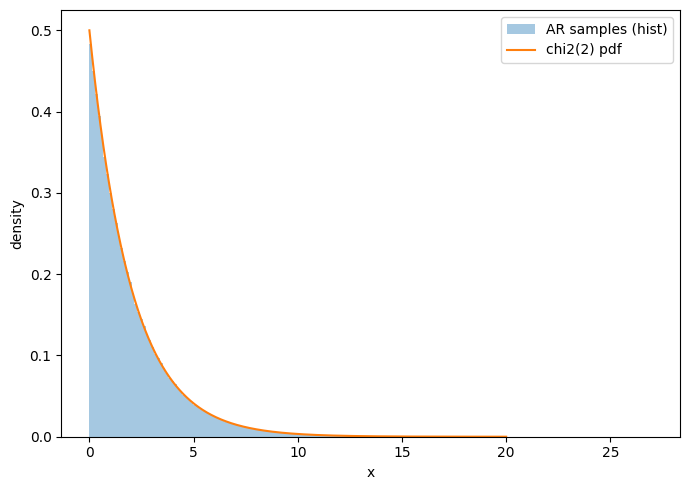

In [220]:
def chi2(K = 1, n=1000000):
    U = rng.random((n, K))
    E = -np.log(U) 
    Chi = 2* E.sum(axis=1)
    return Chi

    
def chi2_pdf(x, k):
    out = 1/(2**(k/2)*math.gamma(k/2))*x**((k/2)-1)*np.exp(-x/2)
    return out

def plot_chi2(x,k=2):
    pdf = chi2_pdf(grid, k)
    plt.figure(figsize=(7,5))
    plt.hist(x, bins=200, density=True, alpha=0.4,label="AR samples (hist)")
    plt.plot(grid, pdf, label=f"chi2({k}) pdf")
    plt.xlabel("x")
    plt.ylabel("density")
    plt.legend()
    plt.tight_layout()
    plt.show()
    

x = chi2()
plot_chi2(x)

## Example: Gamma Distribution with $\alpha \in \mathbb{N}^{*}$

$$X \sim \mathcal{Exp}(\lambda):f(x;\lambda)=\lambda e^{-\lambda x}$$

$$ Y \sim \mathcal{G}(\alpha,\lambda): f(x;\alpha,\lambda)=\frac{\lambda^{\alpha}}{\Gamma(\alpha)}y^{\alpha-1}e^{-\lambda y}$$

$$ \mathcal{Exp}(1)= \mathcal{G}(1,1)$$

$$1/\lambda \times \mathcal{Exp}(1)= \mathcal{Exp}(\lambda)=\mathcal{G}(1,\lambda)$$

$$X_{1} \sim \mathcal{G}(\alpha_{1},\lambda), \quad X_{2} \sim \mathcal{G}(\alpha_{2},\lambda) \Rightarrow Y=X_{1}+X_{2} = \mathcal{G}(\alpha_{1}+\alpha_{2},\lambda)$$

$$f_{Y}(y)=\int_{0}^{y}f_{X_{1}}(x_{1})f_{X_{2}}(y-x_{1})dx_{1} = \int_{0}^{y} \frac{\lambda^{\alpha_{1}}}{\Gamma(\alpha_{1})}x_{1}^{\alpha-1}e^{-\lambda x_{1}}\frac{\lambda^{\alpha_{2}}}{\Gamma(\alpha_{2})}(y-x_{1})^{\alpha_{2}-1}e^{-\lambda (y-x_{1})}dx_{1}$$

$$= \frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1})\Gamma(\alpha_{2})}e^{-\lambda y}\int_{0}^{y}x_{1}^{\alpha-1}(y-x_{1})^{\alpha_{2}-1} dx_{1}$$

$$u = x_{1}/y, \quad d u= d x_{1}/y, \quad x_{1})=uy$$

$$= \frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1})\Gamma(\alpha_{2})}e^{-\lambda y}\int_{0}^{y}(uy)^{\alpha-1}(y-uy)^{\alpha_{2}-1} du /y=\frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1})\Gamma(\alpha_{2})}e^{-\lambda y}y^{\alpha_{1}+\alpha_{2}-1}\int_{0}^{y}(u)^{\alpha-1}(1-u)^{\alpha_{2}-1} du $$

$$ = \frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1})\Gamma(\alpha_{2})}e^{-\lambda y}y^{\alpha_{1}+\alpha_{2}-1} \frac{\Gamma(\alpha_{1}\Gamma(\alpha_{2}}{\Gamma(\alpha_{1}+\alpha_{2}}=  \frac{\lambda^{\alpha_{1}+\alpha_{2}}}{\Gamma(\alpha_{1}+\alpha_{2})}e^{-\lambda y}y^{\alpha_{1}+\alpha_{2}-1} \sim \mathcal{G}(\alpha_{1}+\alpha_{2},\lambda)$$

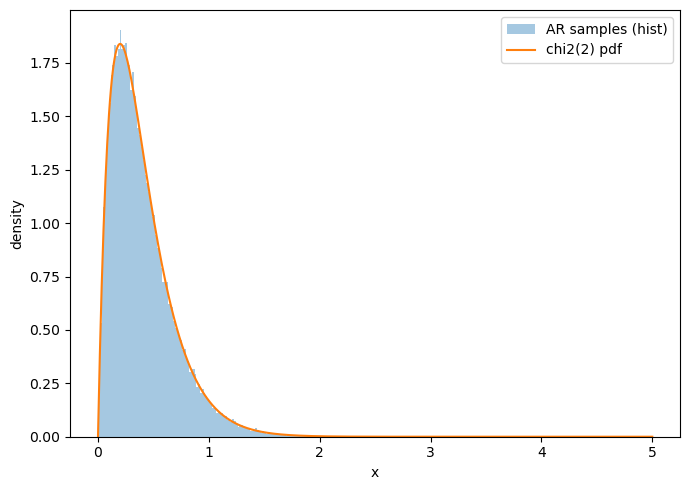

In [307]:
U = rng.random((100000, 2))
E = -np.log(U) 
Chi = 1/5* E.sum(axis=1)
grid = np.linspace(0, 5, 600)
a=2
l=5
def gamma_pdf(x, a,l):
    out = 1/math.gamma(a)*l**a*x**(a-1)*np.exp(-l*x)
    return out

pdf = gamma_pdf(grid, a,l)
plt.figure(figsize=(7,5))
plt.hist(Chi, bins=200, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf, label=f"chi2({k}) pdf")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

## Example: Beta Distribution with $a,b \in \mathbf{N}^{*}$

$$X \sim \mathcal{Exp}(\lambda):f(x;\lambda)=\lambda e^{-\lambda x}$$

$$ Y= \frac{\sum_{j=1}^{a} X_{j}}{\sum_{j=1}^{a+b} X_{j}}= \frac{\mathcal{G}(a,\lambda)}{\mathcal{G}(a,\lambda)+\mathcal{G}(b,\lambda)} \sim \mathcal{Be}(a,b), \quad a,b \in \mathbb{N}^{*}$$

$$Y= \frac{U}{U+V}= \frac{U}{T},\quad T=U+V,\quad  U=YT,\quad V(1-Y)T$$

$$J = \det \begin{pmatrix}\frac{\partial U}{\partial Y} & \frac{\partial U}{\partial T} \\ \frac{\partial V}{\partial Y} & \frac{\partial V}{\partial T}\end{pmatrix}  = \det \begin{pmatrix}T &Y \\ -T & 1-Y\end{pmatrix}= T[(1-Y)+Y]=T$$

$$ f_{Y,T}(y,t)=f_{U,V}(yt,(1-y)t)|J|= \frac{\lambda^{a}}{\Gamma(a)}(yt)^{a-1}e^{-\lambda y t} \frac{\lambda^{b}}{\Gamma(b)}((1-y)t)^{b-1}e^{-\lambda(1-y)t}t$$

$$ =\frac{\lambda^{a+b}}{\Gamma(a)\Gamma(b)}y^{a-1}(1-y)^{b-1}t^{a+b-1}e^{-\lambda t}= \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}y^{a-1}(1-y)^{b-1} \times \frac{\lambda^{a+b}}{\Gamma(a+b)}t^{a+b-1}e^{-\lambda t} $$

$$ = \mathcal{Be}(a,b) \times \mathcal{G}(a+b,1)$$

/var/folders/_b/28jfj19121qf32rdzd8twc000000gn/T/ipykernel_27441/2324028245.py:11: RuntimeWarning: divide by zero encountered in log
  return np.exp((a - 1) * np.log(x) + (b - 1) * np.log(1 - x) - logB)


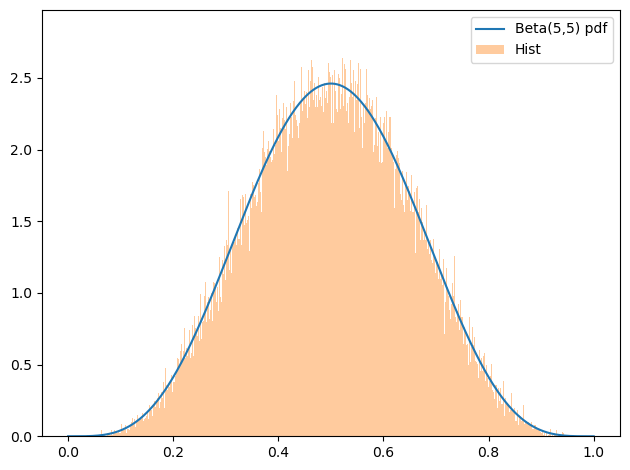

In [306]:
U1 = rng.random((100000,5))
X1 = -np.log(U1)
U1 = X1.sum(axis=1)
U2=  rng.random((100000,5))
X2 = -np.log(U2)
U2 = X2.sum(axis=1)
B = U1/(U1+U2)

def beta_pdf(x, a, b):
    logB = math.lgamma(a) + math.lgamma(b) - math.lgamma(a + b)
    return np.exp((a - 1) * np.log(x) + (b - 1) * np.log(1 - x) - logB)
    
a, b = 5, 5
pdf = beta_pdf(grid, a, b)
x = np.asarray(B, float)
grid = np.linspace(0, 1, 600)           
              
plt.figure()
plt.plot(grid, pdf, label=f"Beta({a},{b}) pdf")
plt.hist(x, bins=1000, density=True, alpha=0.4, label="Hist")
plt.legend(); plt.tight_layout(); plt.show()

## Example: Poisson Distribution

The Poisson distribution $\mathcal{P}(\lambda)$ is connected to the exponential distribution through the Poisson process in that it can be simulated by generating exponential random variables until their sum exceeds 1. That is, if $X_{i} \sim \mathcal{Exp}(\lambda)$ and if $K$ is the first value for which $\sum_{i=1}^{K+1} X_{1} >1$, then $K \sim \mathcal{P}(\lambda)$.


In [79]:
import numpy as np
import math
rng = np.random.default_rng(1)
N = 100000
K = np.empty(N, dtype=int)
for i in range (0,100000):
    s = 0
    k =0 
    while s<1:
        U = rng.uniform(0,1)
        X = -np.log(U)*1/5
        s += X
        k  +=1
    K[i] = k -1

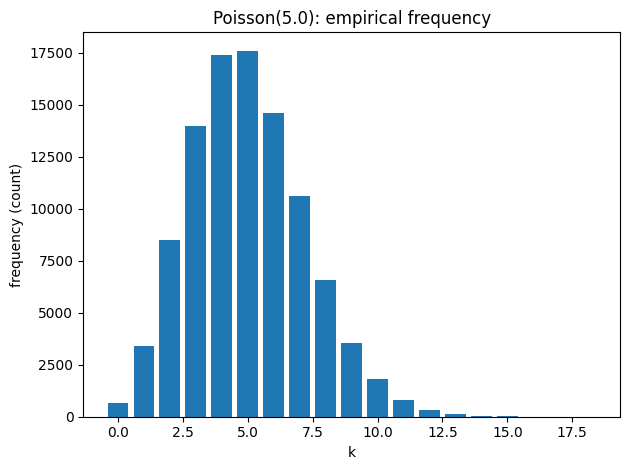

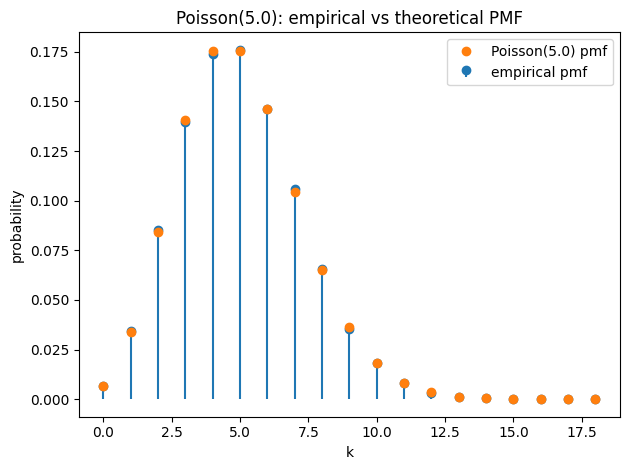

In [100]:

counts = np.bincount(K)                  
ks = np.arange(len(counts))
lam = 5.0
plt.figure()
plt.bar(ks, counts, width=0.8, align='center')
plt.xlabel("k")
plt.ylabel("frequency (count)")
plt.title(f"Poisson({lam}): empirical frequency")
plt.tight_layout()

# --- Empirical PMF (normalized frequencies) vs theoretical PMF
emp_pmf = counts / K.size

def pois_pmf(k, lam):
    # vectorized Poisson pmf (simple version; fine here since k stays small)
    k = np.asarray(k, dtype=int)
    return np.exp(-lam) * (lam ** k) / np.vectorize(math.factorial)(k)

lam = 5.0
theo_pmf = pois_pmf(ks, lam)

plt.figure()
plt.stem(ks, emp_pmf, basefmt=" ", label="empirical pmf")
plt.plot(ks, theo_pmf, marker="o", linestyle="none", label=f"Poisson({lam}) pmf")
plt.xlabel("k")
plt.ylabel("probability")
plt.title(f"Poisson({lam}): empirical vs theoretical PMF")
plt.legend()
plt.tight_layout()
plt.show()

## Example: F-Distribution

The F-distribution with $d_{1}$ and $d_{2}$ degrees of freedom is the distribution of

$$X={\frac {U_{1}/d_{1}}{U_{2}/d_{2}}}$$

where $U_{1}$ and $U_{2}$ are independent random variables with chi-square distributions with respective degrees of freedom $d_{1}$ and $d_{2}$.

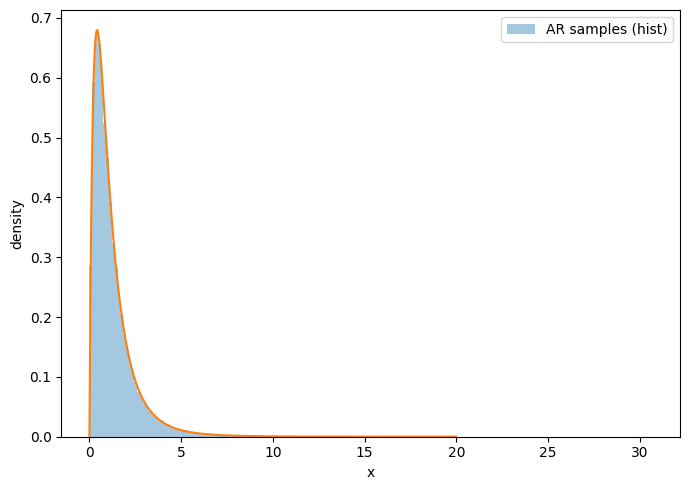

In [109]:
U1 = rng.random((100000, 2))
E = -np.log(U1) 
Chi1 = 2* E.sum(axis=1)
k1=4

U2 = rng.random((100000, 5))
E = -np.log(U2) 
Chi2 = 2* E.sum(axis=1)
k2=10

F = (Chi1/k1)/(Chi2/k2)

def f_pdf(x, d1, d2):
    x = np.asarray(x, dtype=np.float64)
    pdf = np.zeros_like(x, dtype=np.float64)
    mask = x > 0
    if not np.any(mask):
        return pdf
    a = 0.5 * d1
    b = 0.5 * d2
    logB = math.lgamma(a) + math.lgamma(b) - math.lgamma(a + b)
    xm = x[mask]
    logpdf = (
        a * np.log(d1 / d2) +
        (a - 1.0) * np.log(xm) -
        (a + b) * np.log(1.0 + (d1 / d2) * xm) -
        logB
    )
    pdf[mask] = np.exp(logpdf)
    return pdf

grid = np.linspace(0, 20, 600) 
pdf = f_pdf(grid,k1,k2)
plt.figure(figsize=(7,5))
plt.hist(F, bins=200, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf)
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

## Example: A normal generator

If $U_{1}$ and $U_{2}$ are iid $\mathcal{U}_{[0,1]}$, the variables $X_{1}$ and $X_{2}$ defined by

$$X_{1} = \sqrt{-2 \log(U_{1})} \cos(2\pi U_{2}), \quad X_{2}= \sqrt{-2 \log(U_{1})} \sin(2\pi U_{2}),$$

are then iid $\mathcal{N}(0,1)$ by virtue of a simple change of variable argument.

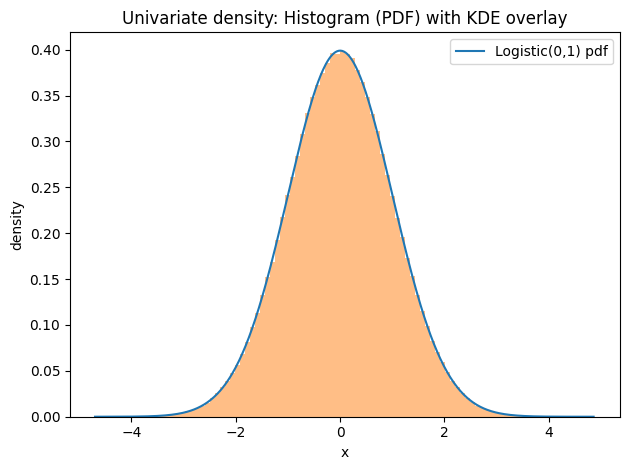

In [206]:
U = rng.random((1000000,2))
X1 = np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])
X2 = np.sqrt(-2 * np.log(U[:,0]))*np.sin(2 * np.pi * U[:,1])

def standard_pdf(x, mu, beta):
    return 1/(np.sqrt(2* np.pi)*beta)*np.exp(-0.5*((x-mu)/beta)**2)


x = np.asarray(X1, float)
grid = np.linspace(x.min(), np.percentile(x, 99.99999), 600)  
mu= 0
beta =1
plt.figure()
pdf = standard_pdf(grid, mu, beta)
plt.plot(grid, pdf, label=f"Logistic({mu},{beta}) pdf")
plt.hist(x, bins=100, density=True, alpha=0.5)
plt.xlabel("x"); plt.ylabel("density")
plt.title("Univariate density: Histogram (PDF) with KDE overlay")
plt.legend(); plt.tight_layout(); plt.show()

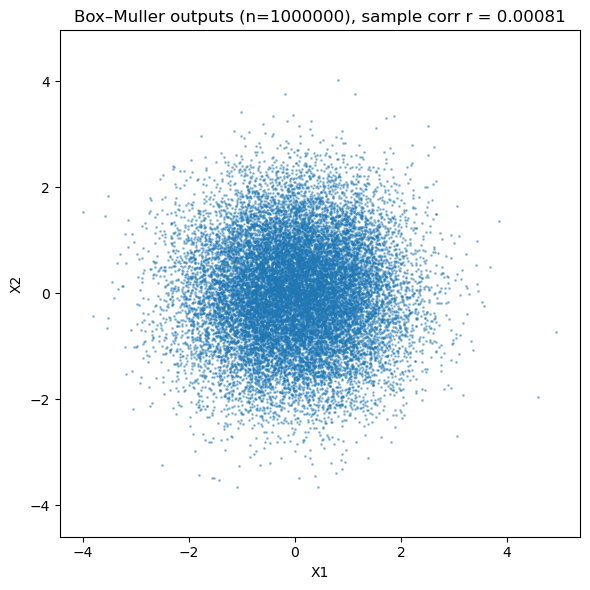

In [140]:
# 1) Downsample for plotting speed/visibility
rng_plot = np.random.default_rng(0)
idx = rng_plot.choice(len(X1), size=20000, replace=False)

plt.figure(figsize=(6,6))
plt.scatter(X1[idx], X2[idx], s=1, alpha=0.4)
r = np.corrcoef(X1, X2)[0, 1]
plt.title(f"Box–Muller outputs (n={len(X1)}), sample corr r = {r:.5f}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.tight_layout()
plt.show()

## Correlated Normal Distribution

$$Z_{1} = \sqrt{-2 \ln U_{1}} \cos(2\pi U_{2}), \quad Z_{2}=\sqrt{-2\ln U_{1}} \sin (2\pi U_{2})$$

$$\Sigma = \begin{pmatrix}1 & \rho \\ \rho & 1\end{pmatrix}= LL^{T}= \begin{pmatrix}l_{11} & 0 \\ l_{12} & l_{22}\end{pmatrix} \begin{pmatrix}l_{11} & l_{12} \\ 0 & l_{22}\end{pmatrix} \Rightarrow L = \begin{pmatrix}1 & 0 \\ \rho & \sqrt{1-\rho^2}\end{pmatrix}$$

$$ X = LZ \Rightarrow \begin{pmatrix}X_{1} \\ X_{2} \end{pmatrix} = \begin{pmatrix}1 & 0 \\ \rho & \sqrt{1-\rho^2}\end{pmatrix}\begin{pmatrix}Z_{1} \\ Z_{2} \end{pmatrix}$$

$$X_{1}=Z_{1}, \quad X_{2} = \rho Z_{1}+\sqrt{1-\rho^2}Z_{2}$$

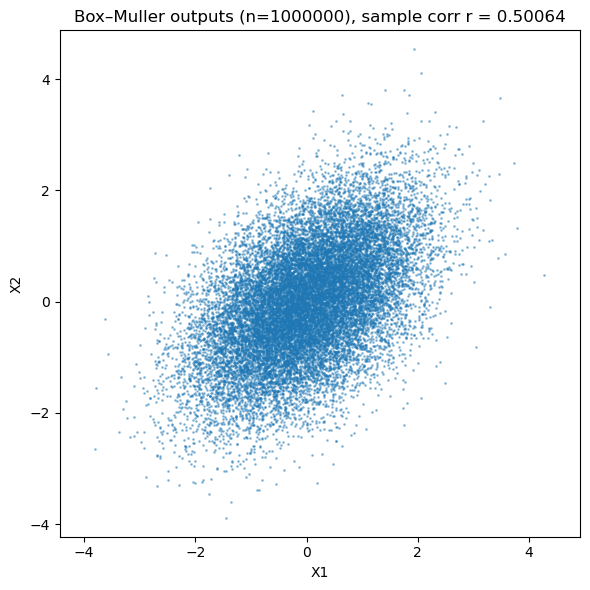

In [336]:
U = rng.random((1000000,2))
X1 = np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])
X2 = np.sqrt(-2 * np.log(U[:,0]))*np.sin(2 * np.pi * U[:,1])
rho = 0.5
X2 = rho *X1 + np.sqrt((1-rho**2)) * X2
rng_plot = np.random.default_rng(0)
idx = rng_plot.choice(len(X1), size=20000, replace=False)

plt.figure(figsize=(6,6))
plt.scatter(X1[idx], X2[idx], s=1, alpha=0.4)
r = np.corrcoef(X1, X2)[0, 1]
plt.title(f"Box–Muller outputs (n={len(X1)}), sample corr r = {r:.5f}")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [40]:
A = np.array([[1.0, 0.5],
              [0.5, 1.0]])

U = chol(A)              # your upper-Cholesky implementation
recon = U.T @ U                # should equal A
err = np.linalg.norm(A - recon, ord=np.inf)
print(U)
print(f"||A - U^T U||_inf = {err:.3e}")

[[1.        0.5      ]
 [0.        0.8660254]]
||A - U^T U||_inf = 1.110e-16


In [41]:
np.sqrt(1-0.5**2)

np.float64(0.8660254037844386)

# Side Tangent: Cholesky decomposition

**Definition.** The Cholesky decomposition of a nonsingular symmetric matrix $A$ consists of finding a nonsigular upper trinagular matrix $U$ with positive entries on the main diagonal such that $A=U^{T}U$. The matrix $U$ is called the Cholesky factor of $A$.

**Lemma.** If a nonsigular symmetric matrix has a Cholesky decomposition, then the matrix must be symmetric positive definite.

**Theorem.** Any symmetric positive definite matrix has a Cholesky decomposition.

**Theorem.** A nonsingular symmetric matrix has a Cholesky decomposition if and only if the matrix is symmetric positive definite.

**Theorem.** The Cholesky decomposition of a symmetric positie definite matrix is unique.

**Lemma.** The operation count for the Cholesky decomposition of an $n\times n$ symmetric positive definite matrix is $\frac{1}{3}n^{3} + O(n^2)$

**Lemma.** The Cholesky factor of the $2\times2$ symmetric positive definite matrix $\begin{pmatrix}a & b \\ b & d\end{pmatrix}$ i.e., with $a>0$ and $ad>b^2$, is

$$U = \begin{pmatrix}\sqrt{a} & \frac{b}{\sqrt{a}} \\ 0 & \sqrt{\frac{ad-b^2}{a}}\end{pmatrix}$$

In [39]:
import numpy as np

def chol(A):
    A = np.asarray(A)
    S = A.copy()
    n = S.shape[0]
    U = np.zeros((n,n))
    
    for k in range(n):
        akk = S[k,k]
        U[k,k] = np.sqrt(akk)
        if k+1<n:
            U[k, k+1:n] = S[k, k+1:n] / U[k, k]
            u = U[k, k+1:n] 
            S[k+1:n, k+1:n] -= np.outer(u, u)
    return U

rng = np.random.default_rng(0)
B = rng.standard_normal((5, 5))
A = B.T @ B
U = chol(A)
err = np.linalg.norm(A - U.T @ U, ord=np.inf)
print(f"||A - U^T U||_inf = {err:.3e}")

||A - U^T U||_inf = 1.554e-15


## Mixture representation

It is sometimes the case that a probability distribution can be naturally represented as a mixture distribution; that is, we can write it in the form

$$ f(x)=\int_{\mathcal{Y}}g(x|y)f(y)dy \quad \text{or} \quad f(x)= \sum _{i\in \mathcal{Y}}p_{i}f_{i}(x)$$

depending on whether the auxiliary space $\mathcal{y}$ is continuous or discrete where $g$ and $p$ are standard distributions that can be easily simulated. To generate a random variable $X$ using such a representation, we can first generate a variable $Y$ from the mixing distribution and then generate $X$ from the selected conditiondal distribution.

For instance, we can write Student's $t$ density with $\nu$ degreesa of freedom $\mathcal{T}_{\nu}$ as a mixture, where

$$ X|Y \sim N(0,\nu/y) \quad \text{and} \quad Y \sim \chi^2_{\nu}$$

Generating from a $\mathcal{T}_{\nu}$ distribution could then amount to generating from a $\chi^2_{\nu}$ distribution and then from the corresponding normal distribution.

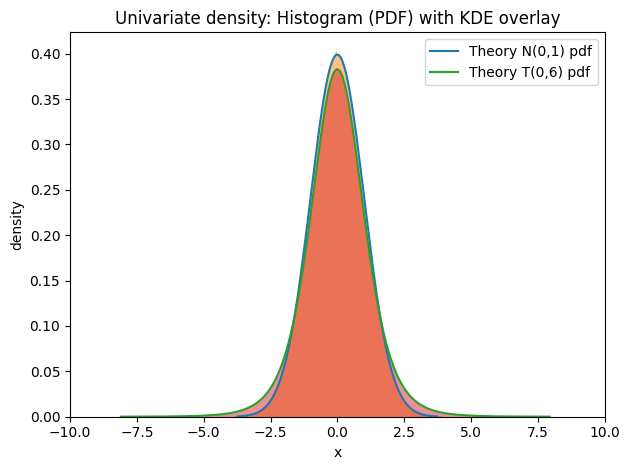

In [221]:
U = rng.random((10000000,2))
U2 = rng.random((10000000, 3))
E = -np.log(U2) 
Chi = 2* E.sum(axis=1)
X1 = np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])
X2 = np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])*np.sqrt(6/Chi)

def standardnormal_pdf(x):
    return 1/(np.sqrt(2 *np.pi))*np.exp(-x**2/2)

def t_pdf(x,nu):
    return math.gamma((nu+1)/2)/(np.sqrt(np.pi * nu)*math.gamma(nu/2))*(1+x**2/nu)**(-(nu+1)/2)

x1 = np.asarray(X1, float)
grid1 = np.linspace(np.percentile(x1, 0.01), np.percentile(x1, 99.99), 600)
pdf1 = standardnormal_pdf(grid1)

x2 = np.asarray(X2, float)
grid2 = np.linspace(np.percentile(x2, 0.01), np.percentile(x2, 99.99), 600)    
pdf2 = t_pdf(grid2, 6)
plt.figure()
plt.plot(grid1, pdf1,label="Theory N(0,1) pdf")
plt.hist(x1, bins=1000, density=True, alpha=0.5)                   
plt.plot(grid2, pdf2,label="Theory T(0,6) pdf")
plt.hist(x2, bins=1000, density=True, alpha=0.5)
plt.xlim(-10,10)
plt.xlabel("x"); plt.ylabel("density")
plt.title("Univariate density: Histogram (PDF) with KDE overlay")
plt.legend(); plt.tight_layout(); plt.show()

# 3. Accept-reject methods

There are many distributions for which the inverse transform method and general transformations will fail to be able to generate the required random variables. For these cases, we must turn to indirfect methods; that is methods in which we generate a candidate random avriable and only accept it subject to passing a test. As we will see, this class of methods is extremely powerful and will allow us to simulate from virtually any distribution.

These so-called Accept-Reject methods only require us to know the functional form of the density $f$ of interest (called the target density) up to a multiplicative constant. We use a simpler (to simulate) density $g$, called the instrumental or candidate density, to generate the random variable for which the simulation is actually done. The only constraints we impose on this candidate density $g$ are that

1. $f$ and $g$ have compatible supports (i.e., $g(x)>0$ when $f(x)>0$).
2. There is a constant $M$ with $f(x)/g(x)\leq M$ for all $x$.

In this case, $X$ can be simulated as follows. First, we generate $Y\sim g$ and, independently, we generate $U\sim \mathcal{U}_{[0,1]}$. If

$$U \leq \frac{1}{m}\frac{f(Y)}{g(Y)}$$

then we set $X=Y$. If the inequality is not satisfied, we then discard $Y$ and $U$ and start again.

Why does this method work? A straightforward probability calculation shows that the cdf of the accpted random variable, $P(Y\leq x|U\leq f(Y)/\{Mg(Y)\})$, is exactly the cdf of $X$.

$$P(Y \leq x|U \leq \frac{f(Y)}{Mg(Y)})= \frac{P(Y\leq x, U \leq f(Y)/Mg(Y))}{P(U\leq f(Y)/Mg(Y))}= \frac{\int_{-\infty}^{x}}{}$$

## Example: Beta Distribution with $a,b>0$

Lets generate draws from a random variable that comes from the distribution $B(a,b)$ for general non-integer $a,b>0$.

$$f(x;a,b) = \frac{1}{B(a,b)}x^{a-1}(1-x)^{b-1}$$

For simplicity lets assume we want to take the instrumental distribution $B(1,1)=\mathcal{U}_{[0,1]}$

The mode of the Beta density is $\frac{\alpha-1}{\alpha+\beta-2}$, so the maximum valuze of the Beta density is

$$\max f(x;a,b) = \frac{1}{B(a,b)}(\frac{\alpha-1}{\alpha+\beta-2})^{a-1}(1-(\frac{\alpha-1}{\alpha+\beta-2}))^{b-1}=M$$

In [189]:
import math
rng = np.random.default_rng()
a=2.5
b=1.5
x_mode = (a - 1.0) / (a + b - 2.0)
one_minus_mode = 1.0 - x_mode
n=100000
out = np.empty(n, dtype=float)
i = 0
while i < n:
    x = rng.random()                
    u = rng.random()
    log_r = ((a - 1.0) * math.log(x / x_mode) + (b - 1.0) * math.log((1.0 - x) / one_minus_mode))
    if math.log(u) <= log_r:
        out[i] = x
        i += 1
out

array([0.75264637, 0.82074364, 0.64448645, ..., 0.56988509, 0.51084526,
       0.3041141 ], shape=(100000,))

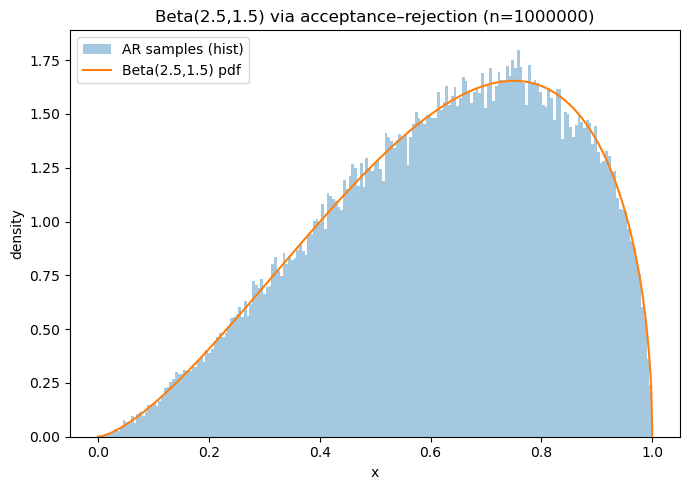

In [190]:
def beta_pdf(x, a, b):
    logB = math.lgamma(a) + math.lgamma(b) - math.lgamma(a + b)
    return np.exp((a - 1) * np.log(x) + (b - 1) * np.log(1 - x) - logB)


a, b = 2.5, 1.5
n = 1000000
samples, acc_rate = beta_ar_uniform(n, a=a, b=b, rng=rng)


grid = np.linspace(1e-6, 1 - 1e-6, 600)
pdf = beta_pdf(grid, a, b)
plt.figure(figsize=(7,5))
plt.hist(out, bins=200, density=True, alpha=0.4, label="AR samples (hist)")
plt.plot(grid, pdf, label=f"Beta({a},{b}) pdf")
plt.xlabel("x")
plt.ylabel("density")
plt.title(f"Beta({a},{b}) via acceptance–rejection (n={n})")
plt.legend()
plt.tight_layout()
plt.show()

## Example: Gamma Distribution with $\alpha>1$

If $\alpha \in \mathbb{N}$ the Gamma distribution is $\mathcal{G}(\alpha,\lambda)$ can be represented as the sum of $\alpha$ exponential random variables $\epsilon_{i} \sim \mathcal{Exp}(\lambda)$. When $\alpha \notin \mathbb{N}$, this representation does not hold.

Because of the transformation $y=1/\lambda x$ we can for sumplicity just assume that $\lambda = 1$.

When $\alpha>1$, we can use the Accept-Reject algorithm with candidate distribution $\mathcal{G}(a,b)$ to generate distribution $\mathcal{G}(\alpha,1)$, as long as $a\leq \alpha$.

$$g(x)=\frac{b^{a}}{\Gamma(a)}x^{a-1}e^{-bx}, \quad f(x)=\frac{1}{\Gamma(\alpha)}x^{\alpha-1}e^{-x} $$

$$M= \frac{f(x)}{g(x)}= \frac{x^{\alpha-1}e^{-x}\Gamma(a)}{\Gamma(\alpha)b^{a}x^{a-1}e^{-bx}}\propto b^{-a}x^{\alpha-a}e^{-(1-b)x}$$

$$\frac{\partial }{\partial x}\frac{f}{g} = b^{-a}x^{\alpha-a-1}e^{-(1-b)x}((\alpha-a)-(1-b)x) \Rightarrow x_{s} = (\alpha - a) / (1 - b)$$

$$ M(a,b)=b^{-a}(\frac{\alpha-a}{1-b})^{\alpha-a}e^{-(1-b)\frac{\alpha-a}{1-b}} \Rightarrow b<1, a<\alpha$$

$$ M(a,b)=b^{-a}(1-b)^{a-\alpha} \times \frac{\alpha-a}{e}^{\alpha-a} \Rightarrow b = a/\alpha $$

$$M(a,a/\alpha)=(a/\alpha)^{-a}(1-(a/\alpha))^{a-\alpha} \times \frac{\alpha-a}{e}^{\alpha-a}=  (a/\alpha)^{-a}\alpha^{\alpha-a}
= \alpha^{\alpha}/a^{a} $$

$$\arg \min M(a,a/\alpha) \Rightarrow a= \lfloor \alpha\rfloor$$


$$U \leq \frac{1}{M}\frac{f(Y)}{g(Y)}= x^{\alpha-a}e^{-(1-b)x} / {x_{s}}^{\alpha-a}e^{-(1-b)x_{s}}$$

Ok now lets try to generate $\mathcal{G}(2.5,1)$ from $\mathcal{G}(2,1)$ which we in turn generate from $\mathcal{Exp}(1)$.

acceptance rate ≈ 0.8871146595697494


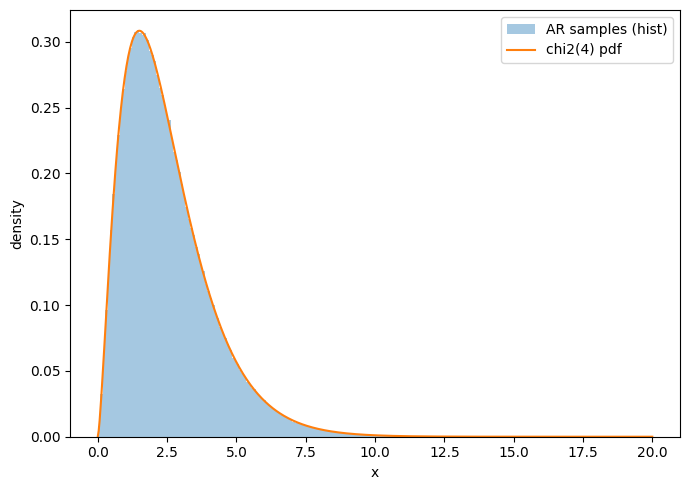

In [177]:
n = 1000000
alpha = 2.5
out = np.empty(n, dtype=float)
i = 0
rng = np.random.default_rng(0)
n = 1_000_000
alpha = 2.5
a = 2
b = a/alpha     
x_star = (alpha - a) / (1 - b)
proposed = 0

while i < n:
    U = rng.random(2)
    E = -(1.0/b) * np.log(U)  
    x = E.sum()
    proposed += 1

    
    logA = (alpha - a) * (np.log(x) - np.log(x_star)) - (1 - b) * (x - x_star)
    if np.log(rng.random()) < logA:
        out[i] = x
        i += 1
print("acceptance rate ≈", n / proposed) 


a=2.5
l=1
grid = np.linspace(0, 20, 600)
def gamma_pdf(x, a,l):
    out = 1/math.gamma(a)*l**a*x**(a-1)*np.exp(-l*x)
    return out

pdf = gamma_pdf(grid, a,l)
plt.figure(figsize=(7,5))
plt.hist(out, bins=200, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf, label=f"chi2({k}) pdf")
plt.xlabel("x")
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

# Example: Normal Distribution from Cauchy

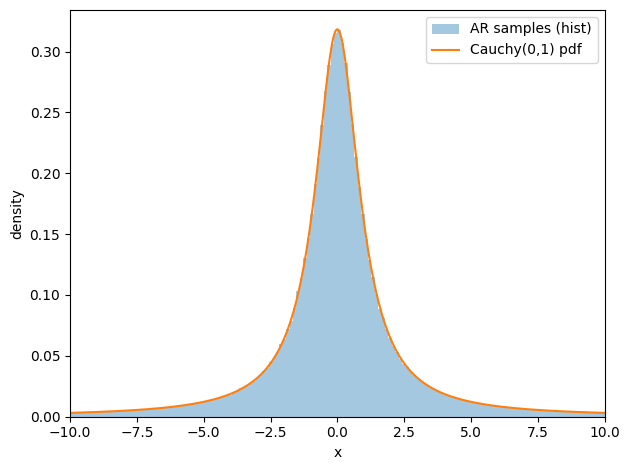

In [179]:
u = rng.random(1000000)
u = np.clip(u, 0.005, 0.995)
mu =0
sigma = 1
x= mu + sigma * np.tan(np.pi * (u-0.5) )
def cauchy_pdf(x, mu, sigma):
    return (1/(np.pi*sigma))* (1/(1+((x-mu)/sigma)**2))
    
def standard_pdf(x, mu, sigma):
    return 1/(np.sqrt(np.pi)*sigma)*np.exp(-((x-mu)/sigma)**2)


grid = np.linspace(-10, 10, 600)
pdf = cauchy_pdf(grid, mu, sigma)
            
plt.figure()
plt.hist(x, bins=1000, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf, label=f"Cauchy({mu},{beta}) pdf")
plt.xlabel("x")
plt.xlim(-10,10)
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

In [184]:
n = 1000000
alpha = 2.5
out = np.empty(n, dtype=float)
i = 0
rng = np.random.default_rng(0)
n = 1_000_000
alpha = 2.5
a = 2
b = a/alpha     
x_star = (alpha - a) / (1 - b)
proposed = 0

while i < n:
    u = rng.random(1)
    u = np.clip(u, 0.005, 0.995)
    mu =0
    sigma = 1
    x= mu + sigma * np.tan(np.pi * (u-0.5) )
    proposed += 1

    
    logA = (x**2+1)/(np.exp(x**2))
    if rng.random() < logA:
        out[i] = x
        i += 1
print("acceptance rate ≈", n / proposed) 

acceptance rate ≈ 0.5641834882675223


/var/folders/_b/28jfj19121qf32rdzd8twc000000gn/T/ipykernel_1464/355773156.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[i] = x
/var/folders/_b/28jfj19121qf32rdzd8twc000000gn/T/ipykernel_1464/355773156.py:22: RuntimeWarning: overflow encountered in exp
  logA = (x**2+1)/(np.exp(x**2))


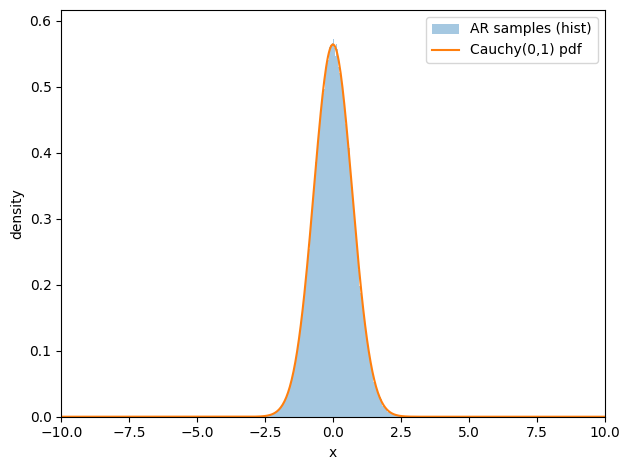

In [186]:
def standard_pdf(x, mu, sigma):
    return 1/(np.sqrt(np.pi)*sigma)*np.exp(-((x-mu)/sigma)**2)


grid = np.linspace(-10, 10, 600)
pdf = standard_pdf(grid, 0, 1)
plt.figure()
plt.hist(out, bins=1000, density=True, alpha=0.4,label="AR samples (hist)")
plt.plot(grid, pdf, label=f"Cauchy({mu},{beta}) pdf")
plt.xlabel("x")
plt.xlim(-10,10)
plt.ylabel("density")
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
import numpy as np
rng = np.random.default_rng(12345)
rho = 0.5
X2 = 0
i = 0
n = 1000000
X1 = [0]*n
X2 = [0]*n
for i in range(n-1):
    U = rng.random((1,2)) 
    X1[i+1] = float((np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])+ rho*X2[i])*np.sqrt(1-rho**2))
    X2[i+1] = float((np.sqrt(-2 * np.log(U[:,0]))*np.sin(2 * np.pi * U[:,1]) + rho*X1[i+1])*np.sqrt(1-rho**2))
r = np.corrcoef(X1[100000:], X2[100000:])
r

/var/folders/_b/28jfj19121qf32rdzd8twc000000gn/T/ipykernel_9517/287666095.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X1[i+1] = float((np.sqrt(-2 * np.log(U[:,0]))*np.cos(2 * np.pi * U[:,1])+ rho*X2[i])*np.sqrt(1-rho**2))
/var/folders/_b/28jfj19121qf32rdzd8twc000000gn/T/ipykernel_9517/287666095.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X2[i+1] = float((np.sqrt(-2 * np.log(U[:,0]))*np.sin(2 * np.pi * U[:,1]) + rho*X1[i+1])*np.sqrt(1-rho**2))


array([[1.        , 0.43262038],
       [0.43262038, 1.        ]])

In [24]:
np.mean(X1)

np.float64(0.0005117403090223985)

In [25]:
np.var(X1)

np.float64(0.9254331396287636)